hello
738.2118978883656
1000.0
Sharpened variance of Laplacian: 16588.103414540114
16588.103414540114
hello


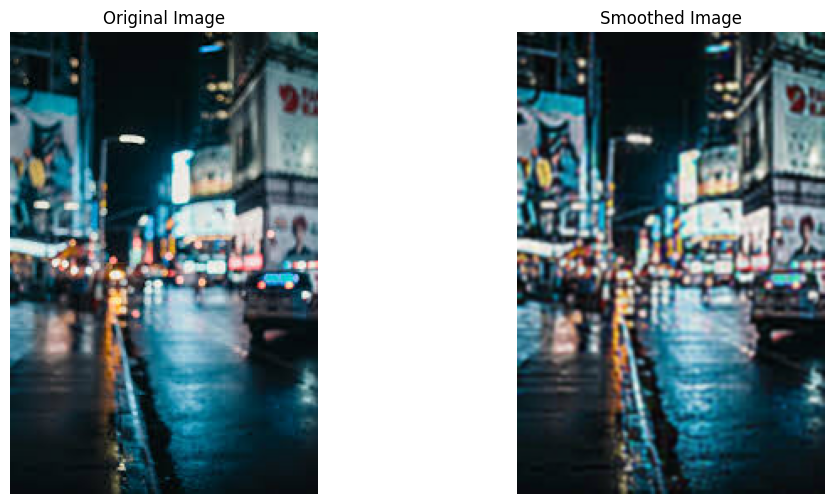

In [10]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
def variance_of_laplacian(image):
    return cv2.Laplacian(image, cv2.CV_64F).var()

def iterative_sharpening(image, threshold=100.0):
    sharpened_image = image.copy()
    sharpened_gray = cv2.cvtColor(sharpened_image, cv2.COLOR_BGR2GRAY)
    sharpened_fm = variance_of_laplacian(sharpened_gray)
    
    while sharpened_fm < threshold:
        sharpened_image = cv2.filter2D(sharpened_image, -1, kernel=np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]]))
        sharpened_gray = cv2.cvtColor(sharpened_image, cv2.COLOR_BGR2GRAY)
        sharpened_fm = variance_of_laplacian(sharpened_gray)
    
    return sharpened_image, sharpened_fm

def smooth_image(image):
    return cv2.GaussianBlur(image, (5, 5), 0)

def process_image(image_path, threshold=100.0):
    image = cv2.imread(image_path)
    
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    fm = variance_of_laplacian(gray)
    print("hello")
    print(fm)
    print(threshold)
    if fm < threshold:
        sharpened_image, sharpened_fm = iterative_sharpening(image, threshold)
        smoothed_image = smooth_image(sharpened_image)
        print(f"Sharpened variance of Laplacian: {sharpened_fm}")

        # Convert images from BGR to RGB for displaying with plt
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        smoothed_image_rgb = cv2.cvtColor(smoothed_image, cv2.COLOR_BGR2RGB)
        print(sharpened_fm)
        print("hello")
        # Show the original and smoothed images
        # Show the original and smoothed images using plt
        plt.figure(figsize=(12, 6))

        plt.subplot(1, 2, 1)
        plt.imshow(image_rgb)
        plt.title("Original Image")
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(smoothed_image_rgb)
        plt.title("Smoothed Image")
        plt.axis('off')

        plt.show()
        # Save the smoothed image
        output_dir = "img"
        if not os.path.exists(output_dir):
            os.makedirs(output_dir)
        smoothed_image_name = os.path.join(output_dir, os.path.splitext(os.path.basename(image_path))[0] + "_smoothed.jpg")
        cv2.imwrite(smoothed_image_name, smoothed_image)

# Example of how to use the function
image_path = "image.png"
process_image(image_path, threshold=1000.0)